<a href="https://colab.research.google.com/github/pszemkor/Sign/blob/master/Sign_language_recogniction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

In [ ]:
# upload kaggle api token
files.upload()

In [4]:
!pip install -q kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets list -s ASL

ref                                                          title                                              size  lastUpdated          downloadCount  
-----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
grassknoted/asl-alphabet                                     ASL Alphabet                                        1GB  2018-04-22 19:31:36          14834  
danrasband/asl-alphabet-test                                 ASL Alphabet Test                                  24MB  2018-08-01 04:02:18           1336  
mrgeislinger/asl-rgb-depth-fingerspelling-spelling-it-out    ASL Fingerspelling Images (RGB & Depth)             2GB  2019-12-17 02:52:11            360  
lucasvieirademiranda/aslalphabet                             asl-alphabet                                        2GB  2018-11-23 17:36:46            127  
datamunge/sign-language-mnist                                Sign Lang

In [8]:
!kaggle datasets download -d 'grassknoted/asl-alphabet'

 98% 1.00G/1.03G [00:06<00:00, 218MB/s]
100% 1.03G/1.03G [00:06<00:00, 164MB/s]


In [9]:
# verification 
!ls
!pwd

asl-alphabet.zip  kaggle.json  sample_data
/content


In [10]:
import os
import zipfile

local_zip = '/content/asl-alphabet.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/asl')
zip_ref.close()

In [11]:
train_data = os.path.join('/tmp/asl/asl_alphabet_train/asl_alphabet_train')
test_data = os.path.join('/tmp/asl/asl_alphabet_test/asl_alphabet_test')
os.listdir(train_data)

['Z',
 'X',
 'del',
 'nothing',
 'I',
 'P',
 'F',
 'R',
 'B',
 'L',
 'E',
 'U',
 'W',
 'T',
 'O',
 'C',
 'D',
 'K',
 'Q',
 'space',
 'N',
 'H',
 'J',
 'V',
 'M',
 'Y',
 'S',
 'G',
 'A']

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4
pic_index = 0

['A1036.jpg', 'A1172.jpg', 'A413.jpg', 'A2094.jpg', 'A1920.jpg', 'A1570.jpg', 'A1244.jpg', 'A1439.jpg', 'A630.jpg', 'A68.jpg', 'A1599.jpg', 'A129.jpg', 'A1063.jpg', 'A1928.jpg', 'A2430.jpg', 'A2529.jpg', 'A2374.jpg', 'A448.jpg', 'A11.jpg', 'A1209.jpg', 'A2601.jpg', 'A306.jpg', 'A1171.jpg', 'A1039.jpg', 'A1127.jpg', 'A2219.jpg', 'A1150.jpg', 'A1191.jpg', 'A2440.jpg', 'A2244.jpg', 'A2774.jpg', 'A1469.jpg', 'A1436.jpg', 'A1054.jpg', 'A2117.jpg', 'A2746.jpg', 'A1196.jpg', 'A1661.jpg', 'A869.jpg', 'A2038.jpg', 'A2439.jpg', 'A1990.jpg', 'A308.jpg', 'A1883.jpg', 'A1496.jpg', 'A310.jpg', 'A2588.jpg', 'A2350.jpg', 'A663.jpg', 'A2214.jpg', 'A1946.jpg', 'A1556.jpg', 'A1634.jpg', 'A2653.jpg', 'A2093.jpg', 'A2493.jpg', 'A683.jpg', 'A593.jpg', 'A1151.jpg', 'A541.jpg', 'A1486.jpg', 'A79.jpg', 'A2589.jpg', 'A1986.jpg', 'A688.jpg', 'A2200.jpg', 'A2919.jpg', 'A1671.jpg', 'A2843.jpg', 'A2017.jpg', 'A2209.jpg', 'A2955.jpg', 'A213.jpg', 'A1977.jpg', 'A2428.jpg', 'A2184.jpg', 'A1377.jpg', 'A2492.jpg', 'A399

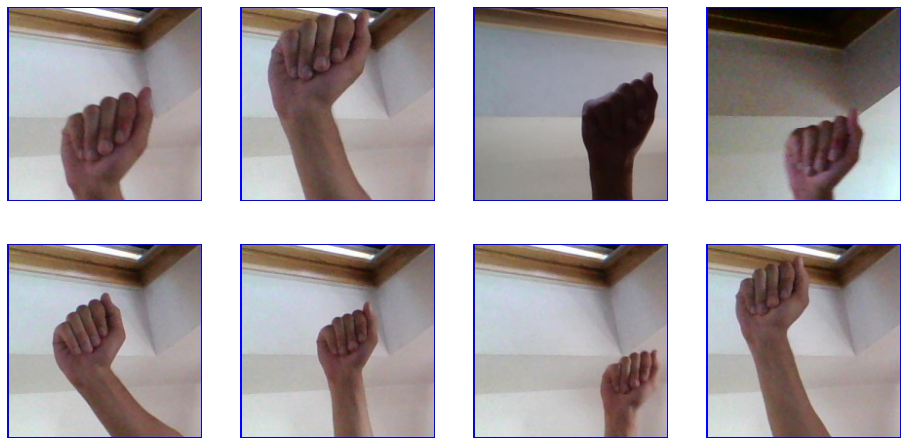

In [13]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
train_data_a_path = os.path.join(train_data,"A")
names = os.listdir(train_data_a_path)
print(names)
print(train_data_a_path)
pic_index += 8
pics = [os.path.join(train_data_a_path, fname) 
                for fname in names[pic_index-8:pic_index]]

for i, img_path in enumerate(pics):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [14]:
import tensorflow as tf

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(29, activation='softmax')
])

In [16]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, shear_range=0.2, zoom_range=0.2,)

In [18]:
train_generator = train_datagen.flow_from_directory(
        train_data,  target_size=(200,200), subset='training')
validation_generator = train_datagen.flow_from_directory(
        train_data, target_size=(200,200), subset='validation')

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [19]:
from tensorflow.keras.callbacks import Callback

class AccCallback(Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs['accuracy'] > 0.95:
      print("Sufficient accuracy achieved")
      self.model.stop_training = True

In [20]:
history = model.fit(
      train_generator,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      callbacks=[AccCallback()])

Epoch 1/15
2175/2175 [==============================] - 837s 385ms/step - loss: 0.6041 - accuracy: 0.8134 - val_loss: 1.2272 - val_accuracy: 0.7357
Epoch 2/15
2175/2175 [==============================] - 815s 375ms/step - loss: 0.0867 - accuracy: 0.9718 - val_loss: 1.1749 - val_accuracy: 0.7678


In [21]:
ci = train_generator.class_indices
inv_map = {v: k for k, v in ci.items()}
print(inv_map)
import json   
json_object = json.dumps(inv_map, indent = 4)   
print(json_object)  

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}
{
    "0": "A",
    "1": "B",
    "2": "C",
    "3": "D",
    "4": "E",
    "5": "F",
    "6": "G",
    "7": "H",
    "8": "I",
    "9": "J",
    "10": "K",
    "11": "L",
    "12": "M",
    "13": "N",
    "14": "O",
    "15": "P",
    "16": "Q",
    "17": "R",
    "18": "S",
    "19": "T",
    "20": "U",
    "21": "V",
    "22": "W",
    "23": "X",
    "24": "Y",
    "25": "Z",
    "26": "del",
    "27": "nothing",
    "28": "space"
}


In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200,200))
  x = image.img_to_array(img)
  print(x.shape)
  x = np.expand_dims(x, axis=0)
  print(x.shape)

  images = np.vstack([x])
  if model is None:
    model = load_model('/tmp/model.h5') 
  print(images.shape)
  print(type(images))
  classes = model.predict(images, batch_size=10)
  print(classes)
  max_id, max_prob = -1, -1
  for i in range(len(classes[0])):
    if classes[0][i] > max_prob:
      max_id = i
      max_prob = classes[0][i]
  print(inv_map)
  print("It is:", inv_map[max_id] )



In [23]:
model.save(filepath='/tmp/model.h5',save_format='h5')
